# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv("./data/06-20-2020.csv")

#### Display the top 5 rows in the data

In [2]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-21 04:33:19,34.223334,-82.461707,86,0,0,86,"Abbeville, South Carolina, US",350.633995,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-21 04:33:19,30.295065,-92.414197,646,32,0,614,"Acadia, Louisiana, US",1041.179789,4.953560
2,51001.0,Accomack,Virginia,US,2020-06-21 04:33:19,37.767072,-75.632346,1024,14,0,1010,"Accomack, Virginia, US",3168.708999,1.367188
3,16001.0,Ada,Idaho,US,2020-06-21 04:33:19,43.452658,-116.241552,1166,22,0,1144,"Ada, Idaho, US",242.116170,1.886792
4,19001.0,Adair,Iowa,US,2020-06-21 04:33:19,41.330756,-94.471059,12,0,0,12,"Adair, Iowa, US",167.785235,0.000000


#### Show the information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3074 non-null   float64
 1   Admin2               3078 non-null   object 
 2   Province_State       3613 non-null   object 
 3   Country_Region       3790 non-null   object 
 4   Last_Update          3790 non-null   object 
 5   Lat                  3713 non-null   float64
 6   Long_                3713 non-null   float64
 7   Confirmed            3790 non-null   int64  
 8   Deaths               3790 non-null   int64  
 9   Recovered            3790 non-null   int64  
 10  Active               3790 non-null   int64  
 11  Combined_Key         3790 non-null   object 
 12  Incidence_Rate       3713 non-null   float64
 13  Case-Fatality_Ratio  3727 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 414.7+ KB


#### Show the sum of missing values of features in the dataset

In [4]:
df.isna().sum()

FIPS                   716
Admin2                 712
Province_State         177
Country_Region           0
Last_Update              0
Lat                     77
Long_                   77
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          77
Case-Fatality_Ratio     63
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [5]:
df.filter(items=['Country_Region','Confirmed']).groupby('Country_Region').sum()

,Confirmed
Country_Region,
Afghanistan,28383
Albania,1891
Algeria,11631
Andorra,855
Angola,176
...,...
West Bank and Gaza,784
Winter Olympics 2022,0
Yemen,922


#### Show the number of Deaths by Country

In [6]:
df.filter(items=['Country_Region','Deaths']).groupby('Country_Region').sum()

,Deaths
Country_Region,
Afghanistan,552
Albania,43
Algeria,837
Andorra,52
Angola,9
...,...
West Bank and Gaza,3
Winter Olympics 2022,0
Yemen,254


#### Show the number of Recovered cases by Country

In [7]:
df.filter(items=['Country_Region','Recovered']).groupby('Country_Region').sum()

,Recovered
Country_Region,
Afghanistan,8292
Albania,1126
Algeria,8324
Andorra,792
Angola,66
...,...
West Bank and Gaza,437
Winter Olympics 2022,0
Yemen,328


#### Show the number of Active Cases by Country

In [8]:
df.filter(items=['Country_Region','Active']).groupby('Country_Region').sum()

,Active
Country_Region,
Afghanistan,19539
Albania,722
Algeria,2470
Andorra,11
Angola,101
...,...
West Bank and Gaza,344
Winter Olympics 2022,0
Yemen,340


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [9]:
df.filter(items=['Country_Region','Comfirmed','Deaths','Recovered','Active']).groupby('Country_Region').sum()

,Deaths,Recovered,Active
Country_Region,,,
Afghanistan,552,8292,19539
Albania,43,1126,722
Algeria,837,8324,2470
Andorra,52,792,11
Angola,9,66,101
...,...,...,...
West Bank and Gaza,3,437,344
Winter Olympics 2022,0,0,0
Yemen,254,328,340


### Question 3

### Show the countries with no recovered cases

In [10]:
df[df['Recovered'] == 0][['Country_Region', 'Recovered']]

,Country_Region,Recovered
0,US,0
1,US,0
2,US,0
3,US,0
4,US,0
...,...,...
3785,Ukraine,0
3786,Nauru,0
3787,New Zealand,0
3788,Tuvalu,0


#### Show the countries with no confirmed cases

In [11]:
df[df['Confirmed'] == 0][['Country_Region', 'Confirmed']]

,Country_Region,Confirmed
84,US,0
145,US,0
237,US,0
319,US,0
713,US,0
...,...,...
3785,Ukraine,0
3786,Nauru,0
3787,New Zealand,0
3788,Tuvalu,0


#### Show the countries with no deaths

In [12]:
df[df['Deaths'] == 0][['Country_Region', 'Deaths']]

,Country_Region,Deaths
0,US,0
4,US,0
6,US,0
9,US,0
12,US,0
...,...,...
3785,Ukraine,0
3786,Nauru,0
3787,New Zealand,0
3788,Tuvalu,0


In [13]:
df.loc[df['Deaths'] == 0,['Country_Region','Confirmed','Deaths','Recovered']]

,Country_Region,Confirmed,Deaths,Recovered
0,US,86,0,0
4,US,12,0,0
6,US,84,0,0
9,US,9,0,0
12,US,7,0,0
...,...,...,...,...
3785,Ukraine,0,0,0
3786,Nauru,0,0,0
3787,New Zealand,0,0,0
3788,Tuvalu,0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [14]:
df.groupby('Country_Region')['Confirmed'].sum().reset_index().sort_values(by='Confirmed',ascending=False).head(10)

,Country_Region,Confirmed
183,US,2259063
24,Brazil,1071666
145,Russia,576162
80,India,410461
187,United Kingdom,304576
139,Peru,251338
164,Spain,245938
86,Italy,238275
36,Chile,236748
82,Iran,202584


#### Show the Top 10 Countries with Active cases

In [15]:
df.groupby('Country_Region')['Active'].sum().reset_index().sort_values(by='Active',ascending=False).head(10)

,Country_Region,Active
183,US,2139480
24,Brazil,394784
187,United Kingdom,260587
145,Russia,234146
36,Chile,232453
139,Peru,218764
80,India,169451
134,Pakistan,105224
63,France,95445
164,Spain,72945


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active cases where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt


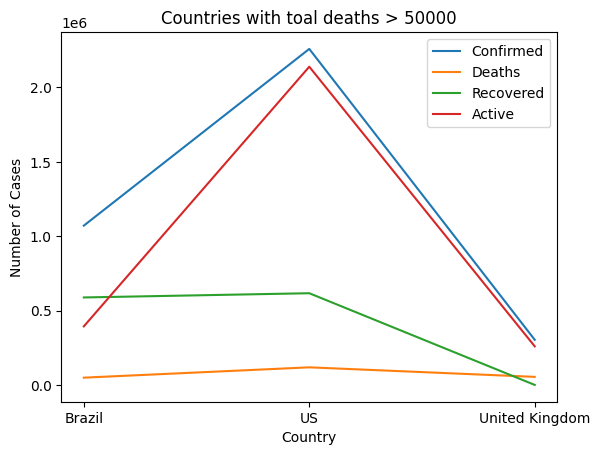

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Brazil,1071666,50100,589074,394784
US,2259063,119518,617460,2139480
United Kingdom,304576,55440,1319,260587


In [17]:
filtered_df = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
filtered_df = filtered_df[filtered_df['Deaths'] > 50000]
filtered_df.set_index('Country_Region', inplace=True)

for column in ['Confirmed', 'Deaths', 'Recovered', 'Active']:
    plt.plot(filtered_df.index, filtered_df[column], label=column)

plt.title('Countries with toal deaths > 50000')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()
filtered_df.head()


### Question 6

### Plot Province/State wise Deaths in USA

In [18]:
import plotly.express as px

In [27]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [28]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [23]:
us_df = df[df['Country_Region'] == 'US'].groupby('Province_State')[['Deaths','Active','Confirmed']].sum().reset_index()

fig = px.bar(us_df, x='Province_State', y='Deaths', 
             title='COVID-19 Deaths by Province/State in the US',
             labels={'Province_State': 'State', 'Deaths': 'Total Deaths'})
fig.update_layout(xaxis_title='State', yaxis_title='Total Deaths', showlegend=False)
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [24]:
fig = px.bar(us_df, x='Province_State', y='Active', 
             title='COVID-19 Active cases by Province/State in the US',
             labels={'Province_State': 'State', 'Active': 'Active Cases'})
fig.update_layout(xaxis_title='State', yaxis_title='Active Cases', showlegend=False)
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [26]:
fig = px.bar(us_df, x='Province_State', y='Confirmed', 
             title='COVID-19 Confirmed Cases by Province/State in the US',
             labels={'Province_State': 'State', 'Confirmed': 'Total Confirmed Cases'})
fig.update_layout(xaxis_title='State', yaxis_title='Total Confirmed Cases', showlegend=False)
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

In [30]:
fig = px.line(covid_data, x='Last_Update', y='Confirmed', 
              title='Worldwide Confirmed COVID-19 Cases Over Time',
              labels={'Last_Update': 'Date', 'Confirmed': 'Confirmed Cases'})
fig.update_layout(xaxis_title='Date', yaxis_title='Confirmed Cases')
fig.show()